In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Clone Darknet git repository 
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15363, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15363 (delta 0), reused 3 (delta 0), pack-reused 15358
Receiving objects: 100% (15363/15363), 13.98 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (10329/10329), done.


In [3]:
%cd /content/darknet

/content/darknet


In [4]:
%cd /content/darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [ ]:
# Run make command to build darknet
!make

In [6]:
# Copy all the files from the ‘yolov4-tiny' folder to the ‘darknet’ directory in Colab VM

%cd /content/darknet/data

# Clean the data and cfg folders except for the labels folder inside the data folder which is required for writing 
# label names on the detection boxes
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/darknet/data
/content/darknet


In [6]:
# Copy Config file 'yolov4-tiny-custom.cfg' to '/content/darknet/cfg' folder of darknet

%cd /content/darknet/cfg

!cp /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/yolov4-tiny/yolov4-tiny-custom.cfg ./

/content/darknet/cfg


In [8]:
# Test your custom Object Detector

# Make changes to your custom config file to set it to test mode
#  - change line batch to batch=1
#  - change line subdivisions to subdivisions=1

%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [11]:

def imShow(path):

  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
'''
** file

obj.names

with_mask
without_mask


** file
obj.data

classes = 2
names = /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/yolov4-tiny/obj.names




 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

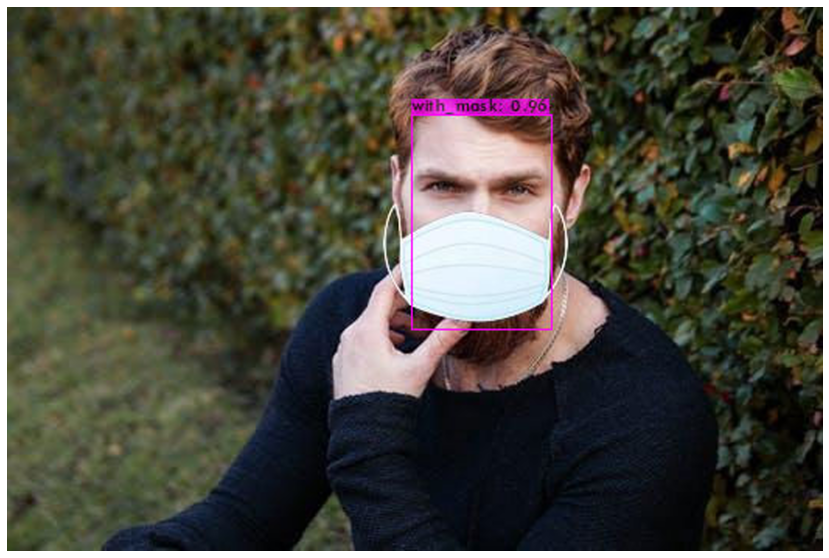

In [14]:
# !./darknet detector test /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/yolov4-tiny/obj.data cfg/yolov4-tiny-custom.cfg /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/yolov4-tiny/training/yolov4-tiny-custom_best.weights /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/0-with-mask.jpg -thresh 0.3

objdata_path = '/content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/yolov4-tiny/obj.data'
config_path = 'cfg/yolov4-tiny-custom.cfg'
weight_path = '/content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/yolov4-tiny/training/yolov4-tiny-custom_best.weights'
img_path = '/content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/YOLO/0-with-mask.jpg'

!./darknet detector test objdata_path config_path weight_path img_path

imShow('predictions.jpg')